In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [14]:
#Load Data for both companies
#Add prefix to each column pertaining to that company and merge dataframes

tsla = pd.read_csv('../Data/TSLA.csv').add_prefix('TSLA_')
msft = pd.read_csv('../Data/MSFT.csv').add_prefix('MSFT_')
data = pd.concat([tsla,msft],axis = 1).rename(columns={'TSLA_Date':'Date'}).drop('MSFT_Date',axis=1)

In [15]:
data

,Date,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,101.010002,101.589996,100.669998,101.050003,95.572868,23490900
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,101.099998,101.449997,100.750000,101.309998,95.818764,18325200
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,101.720001,102.010002,100.559998,100.849998,95.383713,29492900
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,101.650002,102.029999,101.000000,101.419998,95.922806,25691800
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,101.510002,101.529999,100.070000,100.129997,94.702736,65738600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,335.329987,335.369995,332.170013,333.679993,333.679993,20396200
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,331.649994,334.489990,322.500000,323.380005,323.380005,40717100
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,323.940002,326.640015,323.350006,325.260010,325.260010,23277700


In [16]:
#Needed to convert date to datetime

data['Date']= pd.to_datetime(data['Date'])


In [17]:
#High level Statistics

st_tsla = data['TSLA_Close'].describe()
st_msft = data['MSFT_Close'].describe()

stats = pd.concat([st_tsla,st_msft],axis = 1)


In [18]:
stats

,TSLA_Close,MSFT_Close
count,1259.000000,1259.000000
mean,145.537898,209.959380
std,113.468284,71.541639
min,11.931333,94.129997
25%,22.608666,137.960000
50%,147.559998,217.690002
75%,236.318329,267.680008
max,409.970001,343.109985


On Average, MSFT stock closing prices are higher (~$209 vs ~$145)

Standard Deviation for TSLA (113) is more dispersed over the 5yr period than MSFT (71). a larger std would typically indicate a higher level of risk due to the volatility

On this same point, TSLA reached a high of 409 compared to MSFT's 343

Text(0.5, 1.0, 'Close Price over Time')

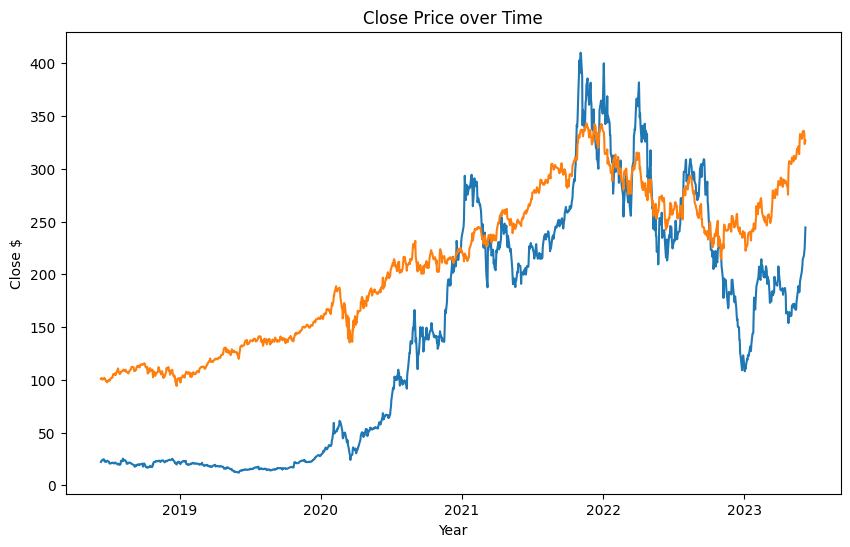

In [19]:
#Set Figure size - figsize=(width, height) in inches

plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['TSLA_Close'])
plt.plot(data['Date'],data['MSFT_Close'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price over Time")

In [20]:
# Plotly Graph, might not show in Github

plt.figure(figsize=(15,10))
fig = px.line(data,x = 'Date', y=['TSLA_Close','MSFT_Close'])
fig.update_layout(title = 'Daily Chart')
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Close $")
fig.show()

<Figure size 1500x1000 with 0 Axes>

TSLA has seen massive growth in the last 5 years. TSLA is seen to also have larger fluctuations than MSFT, depicting its volatility

## News

### MSFT

__Headline__: Microsoft launches Fabric, a new end-to-end data and analytics platform

This article written on the 23rd May, detailing the news of MSFT's new SaaS platform which integrates multiple services cold explain the small uptick in the closing price

__Headline__: Microsoft fined $20m after collecting children’s data on Xbox consoles

This article written on 6th June could be correlated to the slight dip in the closing price in the previous day for MSFT

## News

### TSLA

__Headline__: Tesla Model Y was the best-selling car worldwide in the first quarter

This article written on the 30th May, detailing the news of TSLA's new milestone in the first quarter; in which that TSLA's model Y "was the No. 1 selling vehicle globally". The constant uptick in TSLA's closing price could be down to news like this


In [21]:
#Create Year col for df
data['Year'] = data['Date'].dt.strftime('%Y')
data_year = data.groupby(['Year'])['TSLA_Close','MSFT_Close'].mean()
data_year = data_year.reset_index()

In [22]:
data_year

,Year,TSLA_Close,MSFT_Close
0,2018,21.382600,106.952695
1,2019,18.235347,130.382024
2,2020,96.665689,193.026126
3,2021,259.998162,275.940754
4,2022,263.093081,268.917091
5,2023,178.269454,277.558091


In [23]:
data_year.Year.tolist()


['2018', '2019', '2020', '2021', '2022', '2023']

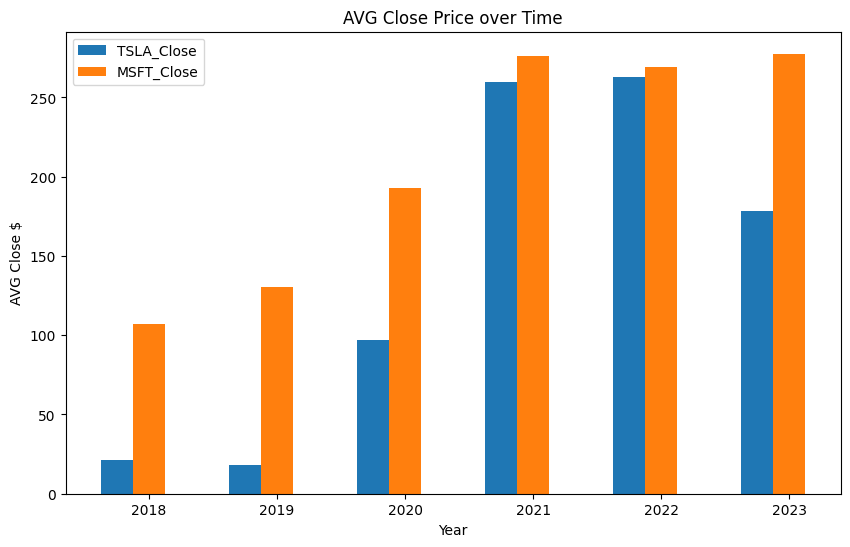

In [24]:
x1 = np.arange(len(data_year))
x2 = [x + 0.25 for x in x1]

plt.figure(figsize=(10,6))
plt.bar(x1, data_year['TSLA_Close'],width=0.25,label ='TSLA_Close')
plt.bar(x2, data_year['MSFT_Close'], width = 0.25, label = 'MSFT_Close')
plt.xticks([r + 0.25 for r in range(len(data_year))], data_year.Year.tolist())

plt.xlabel('Year') 
plt.ylabel('AVG Close $') 

# displaying the title
plt.title("AVG Close Price over Time")
plt.legend()


The average closing price of TSLA has consistently been below MSFT over the last 5 years.

In the case of affordability, one might look to invest in TSLA as it could be seen as 'easier'.

However, one must also take into account the growth, and potential of the company - and purely not it's affordability

In [25]:
def rsi(data,stock,rolling = 14):
    data[stock +'_Change'] = data[stock + '_Close'].diff()

    change = data[stock + '_Close'].diff()
    #change.dropna(inplace=True)

    change_up = change.copy()
    change_down = change.copy()

    change_up[change_up<0] = 0
    change_down[change_down>0] = 0


    # Calculate the rolling average of average up and average down
    avg_up = change_up.rolling(rolling).mean()
    avg_down = change_down.rolling(rolling).mean().abs()

    rsi = 100 - (100/(1+ avg_up /avg_down))
    data[stock + '_RSI'] = rsi

    return data

RSI stands for Relative Strength Index, and it is a popular technical indicator used in financial markets to analyze price movements of various assets, such as stocks

RS = Average Gain / Average Loss

The RSI is typically displayed on a scale from 0 to 100. A reading above 70 is considered overbought, suggesting that the asset may be due for a price correction i.e. downward trend. On the other hand, an RSI below 30 is considered oversold, indicating that the asset may be set for a price rebound i.e upward trend.

In [26]:
data = rsi(data,'TSLA')
data = rsi(data,'MSFT')

In [27]:
data

,Date,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,Year,TSLA_Change,TSLA_RSI,MSFT_Change,MSFT_RSI
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,101.010002,101.589996,100.669998,101.050003,95.572868,23490900,2018,NaN,NaN,NaN,NaN
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,101.099998,101.449997,100.750000,101.309998,95.818764,18325200,2018,0.711335,NaN,0.259995,NaN
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,101.720001,102.010002,100.559998,100.849998,95.383713,29492900,2018,0.133998,NaN,-0.460000,NaN
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,101.650002,102.029999,101.000000,101.419998,95.922806,25691800,2018,0.862668,NaN,0.570000,NaN
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,101.510002,101.529999,100.070000,100.129997,94.702736,65738600,2018,0.030000,NaN,-1.290001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,335.220001,338.559998,334.660004,335.940002,335.940002,21307100,2023,3.640000,90.553795,0.540008,76.217848
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,335.329987,335.369995,332.170013,333.679993,333.679993,20396200,2023,3.699997,91.053497,-2.260009,71.731390
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,331.649994,334.489990,322.500000,323.380005,323.380005,40717100,2023,3.260009,90.470870,-10.299988,58.014364
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,323.940002,326.640015,323.350006,325.260010,325.260010,23277700,2023,10.289994,91.460448,1.880005,56.030802


In [28]:
# Plotly Graph, might not show in Github
fig = px.line(data, x='Date', y=['TSLA_RSI','MSFT_RSI'], title='Relative Strength Index (RSI)')

#.add_shape allows to add more instances on the same figure - like constant lines 

fig.add_shape(type='line',
              x0=data['Date'].iloc[0], y0=30, x1=data['Date'].iloc[-1], y1=30,
              line=dict(color='red', dash='dash'),
              name='Lower Threshold')

fig.add_shape(type='line',
              x0=data['Date'].iloc[0], y0=70, x1=data['Date'].iloc[-1], y1=70,
              line=dict(color='green', dash='dash'),
              name='Upper Threshold')


fig.update_xaxes(title='Date')
fig.update_yaxes(title='RSI')

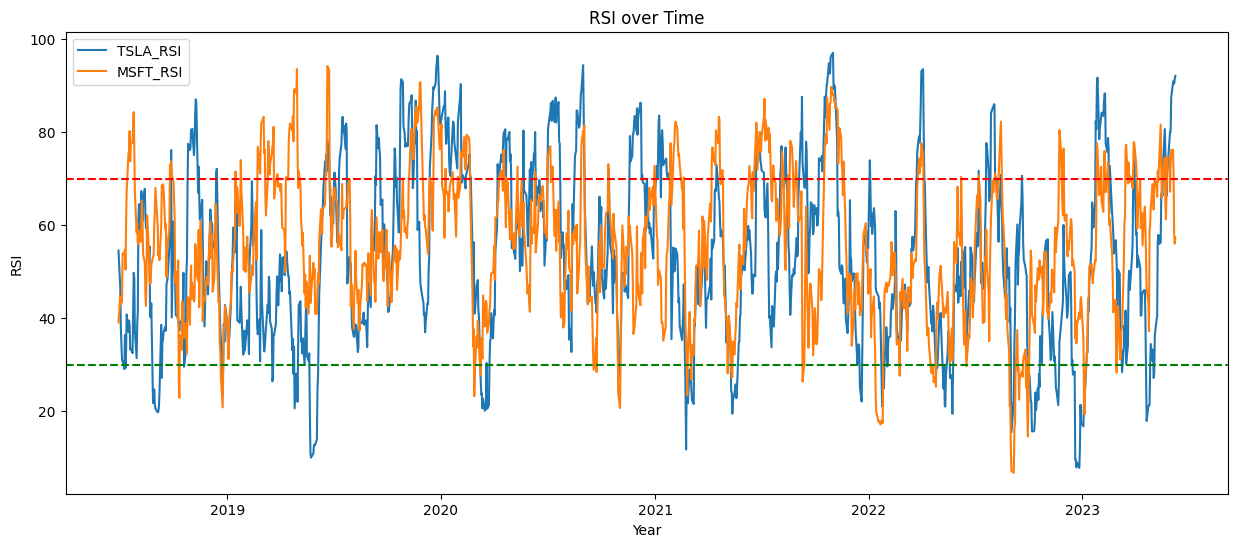

In [29]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'],data['TSLA_RSI'], label = 'TSLA_RSI')
plt.plot(data['Date'],data['MSFT_RSI'], label = 'MSFT_RSI')

plt.xlabel('Year') 
plt.ylabel('RSI') 


plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')
  
# displaying the title
plt.title("RSI over Time")
plt.legend()

With the Plotly graph, we can zoom in on the last week; TSLA's RSI has consistently been above the overbought threshold. Depicting that the stock is due to correct its price, and decrease in price.


In contrast, MSFT's RSI showed to decrease from a reading of above 70 in the last few days, this is consistent with its decrease lower closing price